Ellipse Parameters: 0.55, 1.74, -0.09, 0.43, 2.88, -6.50
Generated Random Point: (-4.83, 10.28)


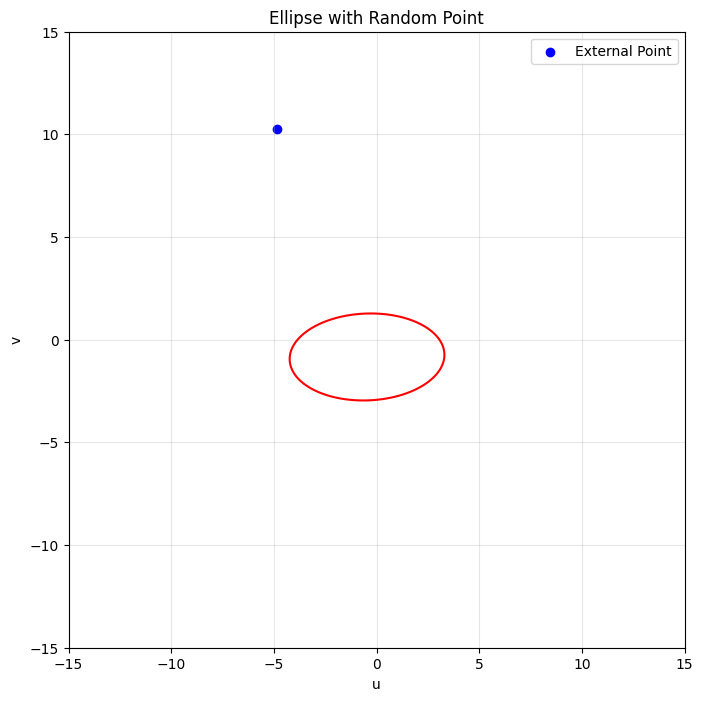

Closest Point: (-2.09124805170131, 1.0243799653946375) with Distance: 9.651215241420054
Farthest Point: (2.1086468010038533, -2.316982221852721) with Distance: 14.38103578218129


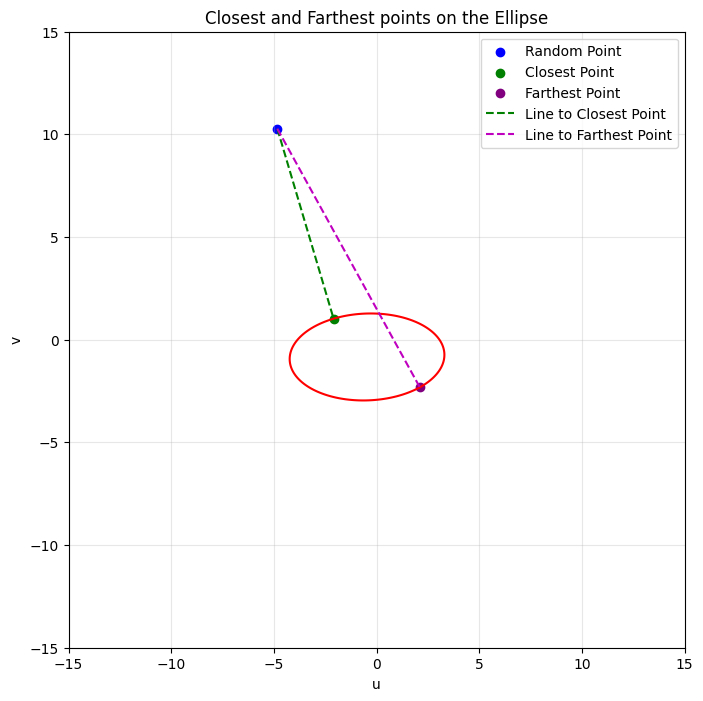

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

class EllipseProcessor:
    def __init__(self):
        """
        Initialize random parameters for the ellipse and an external point.
        """
        self.params = self.initialize_ellipse_params()
        self.ext_point = self.create_external_point()

    def initialize_ellipse_params(self):
        """
        Randomly generate parameters for an ellipse in the form:
            Ax^2 + By^2 + Cxy + Dx + Ey + F = 0
        """
        param_a = np.random.uniform(0.5, 1.5)
        param_b = np.random.uniform(1, 3)
        param_c = np.random.uniform(-0.1, 0.1)
        param_d = np.random.uniform(-5, 5)
        param_e = np.random.uniform(-3, 3)
        param_f = np.random.uniform(-20, -5)
        print(f"Ellipse Parameters: {param_a:.2f}, {param_b:.2f}, {param_c:.2f}, {param_d:.2f}, {param_e:.2f}, {param_f:.2f}")
        return param_a, param_b, param_c, param_d, param_e, param_f

    def create_external_point(self):
        """
        Generate a random point located outside the ellipse.
        """
        
        x_rand = np.random.uniform(-15, 15)
        y_rand = np.random.uniform(-15, 15)
        check_value = (
            self.params[0] * x_rand**2 + self.params[1] * y_rand**2 + self.params[2] * x_rand * y_rand +
            self.params[3] * x_rand + self.params[4] * y_rand + self.params[5]
        )
        if check_value > 0:
            print(f"Generated Random Point: ({x_rand:.2f}, {y_rand:.2f})")
            return x_rand, y_rand

    def display_ellipse_with_point(self):
        """
        Visualize the ellipse and the external point.
        """
        u = np.linspace(-15, 15, 400)
        v = np.linspace(-15, 15, 400)
        U, V = np.meshgrid(u, v)
        ellipse_eq = (
            self.params[0] * U**2 + self.params[1] * V**2 + self.params[2] * U * V +
            self.params[3] * U + self.params[4] * V + self.params[5]
        )

        plt.figure(figsize=(8, 8))
        plt.contour(U, V, ellipse_eq, levels=[0], colors="red")
        plt.scatter(*self.ext_point, color="blue", label="External Point")
        plt.title("Ellipse with Random Point")
        plt.xlabel("u")
        plt.ylabel("v")
        plt.grid(alpha=0.3)
        plt.legend()
        plt.gca().set_aspect("equal", adjustable="box")
        plt.savefig("ellipse_with_random_point.png")
        plt.show()
    
    def calculate_constraint(self, lambda_val):
        """
        Define the constraint equatioHybrid Powell methodn for valid points on the ellipse.
        """
        x0, y0 = self.ext_point
        A, B, C, D, E, F = self.params
        quad_matrix = np.array([[A, C / 2], [C / 2, B]])
        linear_terms = np.array([D / 2, E / 2])

        def poly_1(l):
            return (E * C / 4 - D * B / 2) * l**2 + (B * x0 - D / 2 - C * y0 / 2) * l + x0

        def poly_2(l):
            return (D * C / 4 - E * A / 2) * l**2 + (A * y0 - E / 2 - C * x0 / 2) * l + y0

        def poly_3(l):
            return (A * B - (C**2) / 4) * l**2 + (A + B) * l + 1

        P1 = poly_1(lambda_val)
        P2 = poly_2(lambda_val)
        P3 = poly_3(lambda_val)

        t1= (
            P1**2 * quad_matrix[0, 0] + 2 * P1 * P2 * quad_matrix[0, 1] + P2**2 * quad_matrix[1, 1]
        ) / P3**2
        t2 = 2 * (linear_terms[0] * P1 + linear_terms[1] * P2) / P3
        return t1 + t2 + F

    def determine_closest_and_farthest(self):
        """
        Compute the closest and farthest points on the ellipse to the external point.
        """
        x0, y0 = self.ext_point
        A, B, C, D, E, F = self.params

        def poly_1(l):
            return (E * C / 4 - D * B / 2) * l**2 + (B * x0 - D / 2 - C * y0 / 2) * l + x0

        def poly_2(l):
            return (D * C / 4 - E * A / 2) * l**2 + (A * y0 - E / 2 - C * x0 / 2) * l + y0

        def poly_3(l):
            return (A * B - (C**2) / 4) * l**2 + (A + B) * l + 1

        solutions = root(
            self.calculate_constraint, x0=np.linspace(-10, 10, 4), method="hybr"
        ).x  #Hybrid Powell method
        solutions = solutions[np.isreal(solutions)].real

        closest_dist = float("inf")
        farthest_dist = float("-inf")
        closest_point = None
        farthest_point = None

        for lam in solutions:
            P1 = poly_1(lam)
            P2 = poly_2(lam)
            P3 = poly_3(lam)
            x = P1 / P3
            y = P2 / P3
            distance = np.linalg.norm([x - x0, y - y0])

            if distance < closest_dist:
                closest_dist = distance
                closest_point = (x, y)

            if distance > farthest_dist:
                farthest_dist = distance
                farthest_point = (x, y)

        print("Closest Point:", closest_point, "with Distance:", closest_dist)
        print("Farthest Point:", farthest_point, "with Distance:", farthest_dist)
        return closest_point, farthest_point

    def plot_results(self, closest, farthest):
        """
        Plot the ellipse, the external point, and the closest and farthest points with lines.
        """
        x0, y0 = self.ext_point
        u = np.linspace(-15, 15, 400)
        v = np.linspace(-15, 15, 400)
        U, V = np.meshgrid(u, v)
        ellipse_eq = (
            self.params[0] * U**2 + self.params[1] * V**2 + self.params[2] * U * V +
            self.params[3] * U + self.params[4] * V + self.params[5]
        )

        plt.figure(figsize=(8, 8))
        plt.contour(U, V, ellipse_eq, levels=[0], colors="red")
        plt.scatter(x0, y0, color="blue", label="Random Point")
        plt.scatter(*closest, color="green", label="Closest Point")
        plt.scatter(*farthest, color="purple", label="Farthest Point")

        plt.plot([x0, closest[0]], [y0, closest[1]], "g--", label="Line to Closest Point")
        plt.plot([x0, farthest[0]], [y0, farthest[1]], "m--", label="Line to Farthest Point")

        plt.title("Closest and Farthest points on the Ellipse")
        plt.xlabel("u")
        plt.ylabel("v")
        plt.grid(alpha=0.3)
        plt.legend()
        plt.gca().set_aspect("equal", adjustable="box")
        plt.savefig("ellipse_analysis.png")
        plt.show()

if __name__ == "__main__":
    processor = EllipseProcessor()
    processor.display_ellipse_with_point()
    closest_point, farthest_point = processor.determine_closest_and_farthest()
    processor.plot_results(closest_point, farthest_point)
